<a href="https://colab.research.google.com/github/HIDAN122/HIDAN122/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Лабораторна робота №3**
**Тема:** “Аналіз даних з використанням бібліотеки Pandas та Matplotlib”
**Мета:** Нехай ми маємо набори даних employees, nba. Виконати попередню обробку даних,
застосувати агрегацію, групування та фільтрацію даних. Реалізувати візуалізацію для
валідованих та конвертованих даних. Дослідити типи об’єднання даних left join, inner
join, right join, full outer join.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import uuid

In [ ]:
df = pd.read_csv('employees.csv', sep=',')

Зчитую дані 'employees.csv'

In [ ]:
df = df.replace('', np.nan)
df[df.isna().any(axis='columns')]

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
7,NaN,Female,7/20/2015,10:43 AM,45906,11.598,NaN,Finance
10,Louise,Female,8/12/1980,9:01 AM,63241,15.132,True,NaN
20,Lois,NaN,4/22/1995,7:18 PM,64714,4.934,True,Legal
22,Joshua,NaN,3/8/2012,1:58 AM,90816,18.816,True,Client Services
...,...,...,...,...,...,...,...,...
961,Antonio,NaN,6/18/1989,9:37 PM,103050,3.050,False,Legal
972,Victor,NaN,7/28/2006,2:49 PM,76381,11.159,True,Sales
985,Stephen,NaN,7/10/1983,8:10 PM,85668,1.909,False,Legal
989,Justin,NaN,2/10/1991,4:58 PM,38344,3.794,False,Legal


Замість пропусків вставляю naN, а також цим виводжу рядки з недопустимими значеннями

In [ ]:
df = df.dropna()
df

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
5,Dennis,Male,4/18/1987,1:35 AM,115163,10.125,False,Legal
...,...,...,...,...,...,...,...,...
994,George,Male,6/21/2013,5:47 PM,98874,4.479,True,Marketing
996,Phillip,Male,1/31/1984,6:30 AM,42392,19.675,False,Finance
997,Russell,Male,5/20/2013,12:39 PM,96914,1.421,False,Product
998,Larry,Male,4/20/2013,4:45 PM,60500,11.985,False,Business Development


Видаляю рядки, які є недопустимі

In [ ]:
df.describe()

,Salary,Bonus %
count,764.000000,764.000000
mean,90433.196335,10.148041
std,32864.665282,5.608733
min,35013.000000,1.015000
25%,62071.750000,5.193250
50%,90428.000000,9.658500
75%,118075.250000,14.965000
max,149908.000000,19.944000


Зробив статистичний аналіз

In [ ]:
df['Salary'].sum()

69090962

Вивів повну суму грошей, які виплачуються за рік

In [ ]:
df.groupby(['Gender']).mean()

,Salary,Bonus %,Experience
Gender,,,
Female,89736.834606,9.960623,23.191300
Male,91170.851752,10.346571,22.113156


Середня заробітна плата між жінками та чоловіками

In [ ]:
df.min()

First Name                          Aaron
Gender                             Female
Start Date                       1/1/2014
Last Login Time                  10:00 AM
Salary                              35013
Bonus %                             1.015
Senior Management                   False
Team                 Business Development
dtype: object

Мінімальна зарплата

In [ ]:
df.max()

First Name             Willie
Gender                   Male
Start Date           9/9/1998
Last Login Time       9:58 PM
Salary                 149908
Bonus %                19.944
Senior Management        True
Team                    Sales
dtype: object

Максимальна зарплата

In [ ]:
from datetime import date
def getExperience(row):
  dataStr = row['Start Date']
  dataList = dataStr.split('/')
  data = date(int(dataList[2]), int(dataList[0]), int(dataList[1]))
  today = date.today()
  delta = today - data
  return delta.days/365
df['Experience'] = df.apply(getExperience, axis = 1) 
df

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team,Experience
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing,28.263014
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance,28.550685
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance,16.679452
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services,23.791781
5,Dennis,Male,4/18/1987,1:35 AM,115163,10.125,False,Legal,34.569863
...,...,...,...,...,...,...,...,...,...
994,George,Male,6/21/2013,5:47 PM,98874,4.479,True,Marketing,8.375342
996,Phillip,Male,1/31/1984,6:30 AM,42392,19.675,False,Finance,37.783562
997,Russell,Male,5/20/2013,12:39 PM,96914,1.421,False,Product,8.463014
998,Larry,Male,4/20/2013,4:45 PM,60500,11.985,False,Business Development,8.545205


Створив нову колонку experience для наступного аналізу

In [ ]:
df = df.sort_values(by=['Experience'])
df

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team,Experience
98,Tina,Female,6/16/2016,7:47 PM,100705,16.961,True,Marketing,5.386301
15,Lillian,Female,6/5/2016,6:09 AM,59414,1.256,False,Product,5.416438
426,Todd,Male,3/16/2016,2:45 PM,134408,3.560,True,Human Resources,5.638356
89,Janice,Female,3/12/2016,12:40 AM,51082,11.955,False,Legal,5.649315
967,Thomas,Male,3/12/2016,3:10 PM,105681,19.572,False,Engineering,5.649315
...,...,...,...,...,...,...,...,...,...
808,Julie,Female,3/8/1980,5:13 AM,145357,3.459,False,Engineering,41.684932
549,Sara,Female,2/25/1980,10:50 PM,75484,3.186,False,Finance,41.717808
272,Fred,Male,2/20/1980,2:25 AM,74129,18.225,False,Product,41.731507
881,Ruby,Female,1/28/1980,11:08 PM,142868,6.318,False,Marketing,41.794521


Сортувати кадри даних зі стажу по зростанню досвіду

Senior Management
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

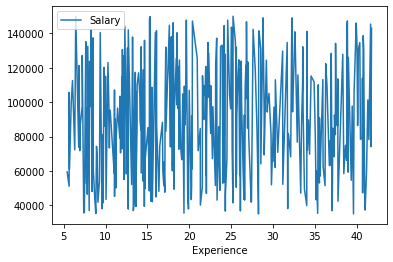

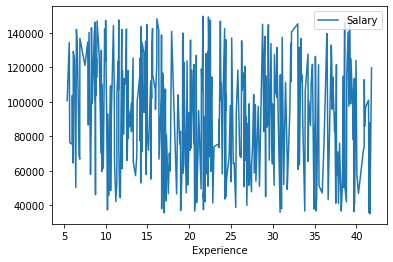

In [ ]:
df.groupby(['Senior Management']).plot(x='Experience', y='Salary')

Провів аналіз, між досвідом та зарплатою немає жодного зв'язку

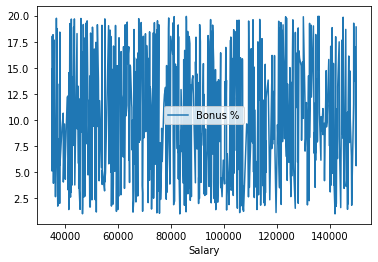

In [ ]:
df.sort_values(by=['Salary']).plot(x='Salary', y='Bonus %')

Немає зв'язку між зарплатою та бонусом %

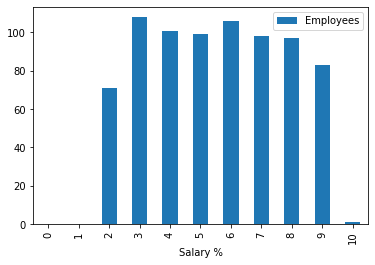

In [ ]:
coef = df['Salary'].max()/10
d = dict.fromkeys(range(11), 0)
for salary in df['Salary']:
  d[int(salary / coef)] += 1

salaryDF = pd.DataFrame(d.items(), columns=['Salary %', 'Employees'])
salaryDF.plot.bar(x='Salary %', y='Employees')

Графік залежності кількості працівників від зарплати

In [ ]:
df.to_csv(index=False)
with pd.ExcelWriter('output.xlsx') as writer:  
    df.to_excel(writer, sheet_name='Sheet_name_3')

Зберігаю датасет

In [ ]:
df['uuid'] = df.apply(lambda _: uuid.uuid4(), axis=1)
df.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team,Experience,uuid
98,Tina,Female,6/16/2016,7:47 PM,100705,16.961,True,Marketing,5.386301,fcc29c06-02f9-4551-b16f-24a7b548b84c
15,Lillian,Female,6/5/2016,6:09 AM,59414,1.256,False,Product,5.416438,522b77b4-37d7-4457-a104-3f37e4680818
426,Todd,Male,3/16/2016,2:45 PM,134408,3.560,True,Human Resources,5.638356,0235542c-6040-45fb-a270-10827b87590a
89,Janice,Female,3/12/2016,12:40 AM,51082,11.955,False,Legal,5.649315,ecb95794-bc50-417f-bece-d61e814417a2
967,Thomas,Male,3/12/2016,3:10 PM,105681,19.572,False,Engineering,5.649315,de36505e-144c-4e9e-b113-314df1c9e957


Щоб використовувати 'joins' та 'merge', давайте створимо uuid для кожного співробітника і створимо 2 нових кадру даних з поточного

In [ ]:
personalInfo = df[['uuid', 'First Name', 'Gender', 'Start Date', 'Salary']]
personalInfo.head()

,uuid,First Name,Gender,Start Date,Salary
98,fcc29c06-02f9-4551-b16f-24a7b548b84c,Tina,Female,6/16/2016,100705
15,522b77b4-37d7-4457-a104-3f37e4680818,Lillian,Female,6/5/2016,59414
426,0235542c-6040-45fb-a270-10827b87590a,Todd,Male,3/16/2016,134408
89,ecb95794-bc50-417f-bece-d61e814417a2,Janice,Female,3/12/2016,51082
967,de36505e-144c-4e9e-b113-314df1c9e957,Thomas,Male,3/12/2016,105681


База даних з персональною інформацією

In [ ]:
employeeInfo = df[['uuid', 'Last Login Time', 'Bonus %', 'Senior Management', 'Team', 'Experience']]
employeeInfo.head()

,uuid,Last Login Time,Bonus %,Senior Management,Team,Experience
98,fcc29c06-02f9-4551-b16f-24a7b548b84c,7:47 PM,16.961,True,Marketing,5.386301
15,522b77b4-37d7-4457-a104-3f37e4680818,6:09 AM,1.256,False,Product,5.416438
426,0235542c-6040-45fb-a270-10827b87590a,2:45 PM,3.560,True,Human Resources,5.638356
89,ecb95794-bc50-417f-bece-d61e814417a2,12:40 AM,11.955,False,Legal,5.649315
967,de36505e-144c-4e9e-b113-314df1c9e957,3:10 PM,19.572,False,Engineering,5.649315


Бази даних з робочою інформацією

In [ ]:
pd.merge(personalInfo, employeeInfo, on='uuid',how='left')

,uuid,First Name,Gender,Start Date,Salary,Last Login Time,Bonus %,Senior Management,Team,Experience
0,fcc29c06-02f9-4551-b16f-24a7b548b84c,Tina,Female,6/16/2016,100705,7:47 PM,16.961,True,Marketing,5.386301
1,522b77b4-37d7-4457-a104-3f37e4680818,Lillian,Female,6/5/2016,59414,6:09 AM,1.256,False,Product,5.416438
2,0235542c-6040-45fb-a270-10827b87590a,Todd,Male,3/16/2016,134408,2:45 PM,3.560,True,Human Resources,5.638356
3,ecb95794-bc50-417f-bece-d61e814417a2,Janice,Female,3/12/2016,51082,12:40 AM,11.955,False,Legal,5.649315
4,de36505e-144c-4e9e-b113-314df1c9e957,Thomas,Male,3/12/2016,105681,3:10 PM,19.572,False,Engineering,5.649315
...,...,...,...,...,...,...,...,...,...,...
759,129f7979-ef14-4fef-9043-9e411f820128,Julie,Female,3/8/1980,145357,5:13 AM,3.459,False,Engineering,41.684932
760,78b850a1-1789-403c-90ee-d7e5e3992393,Sara,Female,2/25/1980,75484,10:50 PM,3.186,False,Finance,41.717808
761,bb7428f9-8cd4-4bf8-b381-590fdc2671a8,Fred,Male,2/20/1980,74129,2:25 AM,18.225,False,Product,41.731507
762,754f51ac-6c28-47d0-8f97-268ed4483b6e,Ruby,Female,1/28/1980,142868,11:08 PM,6.318,False,Marketing,41.794521


Висновок: На даній лабораторній роботі працював над аналізом даних з використанням бібліотек pandas and matplotlib. Виконав попередню обробку даних, застосував агрегацію, групування та фільтрацію даних. Реалізував візуалізацію для валідованих та конвертованих даних. Дослідив типи об'єднання даних (merge/join).